# Perform Exploratory Data Analysis on Indian Premier League Dataset

**As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.**

**Suggest teams or players a company should endorse for its products.**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading Dataset
matches = pd.read_csv("Data\matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [16]:
matches.shape

(756, 18)

In [6]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
# Loading 2nd Dataset
deliveries = pd.read_csv("Data\deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [13]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [14]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [17]:
deliveries.shape

(179078, 21)

In [18]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


** Now, We will merge the 2 datasets for better insights from the data **

In [45]:
print("Number of Seasons:", matches['season'].nunique())
print("Seasons:",matches['season'].unique())
print("Number of matches played:", matches.index.nunique())

Number of Seasons: 12
Seasons: [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
Number of matches played: 756


In [46]:
matches.replace(['Rising Pune Supergiant'], ['Rising Pune Supergiants'],inplace=True)
matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

deliveries.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

print('Number of Teams:', matches['team1'].nunique())
print('Teams featured in the Tournament:\n',matches['team1'].unique() )

Number of Teams: 14
Teams featured in the Tournament:
 ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW'
 'DCa']


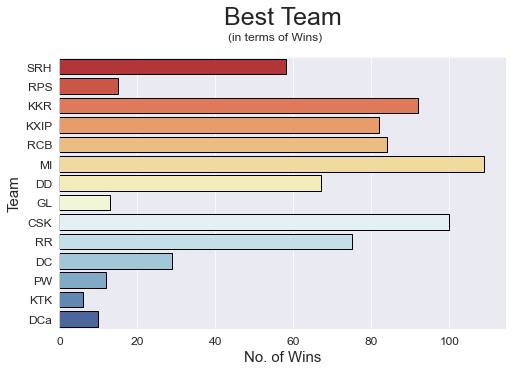

In [47]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.countplot(y=matches['winner'], palette='RdYlBu', edgecolor='black')
plt.title('Best Team\n', size=25)
plt.suptitle('\n(in terms of Wins)')
plt.ylabel('Team', size=15)
plt.xlabel('No. of Wins', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

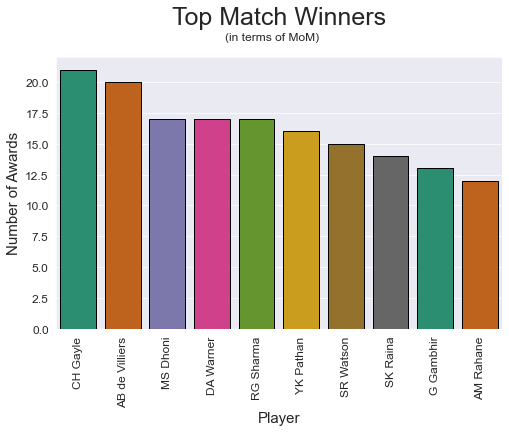

In [48]:
most_mom = matches['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns = ['Player', 'No. of Awards']

plt.figure(figsize=(8,5))
sns.barplot(x=most_mom['Player'], y=most_mom['No. of Awards'], palette='Dark2', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Top Match Winners\n', size=25)
plt.suptitle('\n(in terms of MoM)')
plt.ylabel('Number of Awards', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

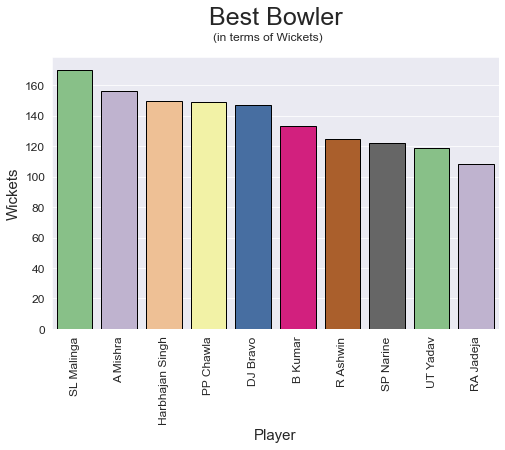

In [51]:
dismissal = ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']
best_bowler = deliveries.loc[deliveries['dismissal_kind'].isin(dismissal)]
best_bowler = best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler['bowler'], y=best_bowler['wickets'],palette='Accent', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Bowler\n', size=25)
plt.suptitle('\n(in terms of Wickets)')
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

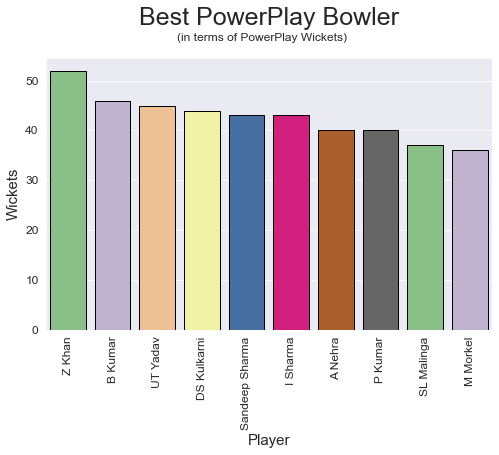

In [52]:
powerplay = [1,2,3,4,5,6]
best_bowler_pp = deliveries.loc[deliveries['dismissal_kind'].isin(dismissal) & deliveries['over'].isin(powerplay)]
best_bowler_pp = best_bowler_pp['bowler'].value_counts().reset_index().head(10)
best_bowler_pp.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler_pp['bowler'], y=best_bowler_pp['wickets'],palette='Accent',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best PowerPlay Bowler\n', size=25)
plt.suptitle('\n(in terms of PowerPlay Wickets)')
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

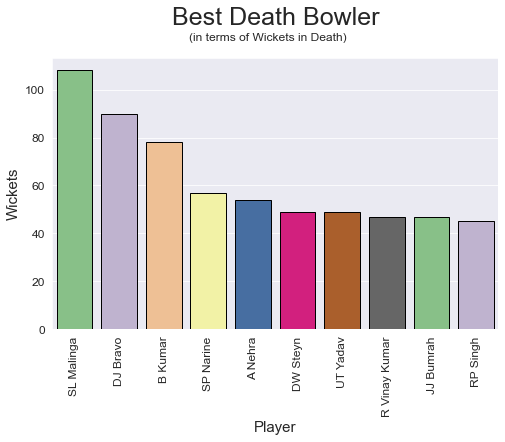

In [53]:
death = [16,17,18,19,20]
best_bowler_death = deliveries.loc[deliveries['dismissal_kind'].isin(dismissal) & deliveries['over'].isin(death)]
best_bowler_death = best_bowler_death['bowler'].value_counts().reset_index().head(10)
best_bowler_death.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler_death['bowler'], y=best_bowler_death['wickets'],palette='Accent',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Death Bowler\n', size=25)
plt.suptitle('\n(in terms of Wickets in Death)')
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

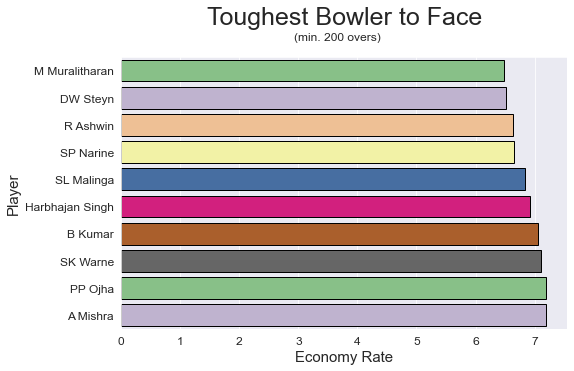

In [54]:
economy_rate=deliveries.groupby(['bowler']).sum()
economy_rate['over'] = deliveries['bowler'].value_counts()/6
economy_rate['runs'] = economy_rate['wide_runs'] + economy_rate['noball_runs'] + economy_rate['batsman_runs']
economy_rate = economy_rate[economy_rate['over'] >= 200]
economy_rate['rate'] = economy_rate['runs']/economy_rate['over']
economy_rate = economy_rate.sort_values(by=['rate'], ascending=True).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=economy_rate['rate'], y=economy_rate.index, palette='Accent',edgecolor='black')
plt.title('Toughest Bowler to Face\n', size=25)
plt.suptitle('\n(min. 200 overs)')
plt.ylabel('Player', size=15)
plt.xlabel('Economy Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

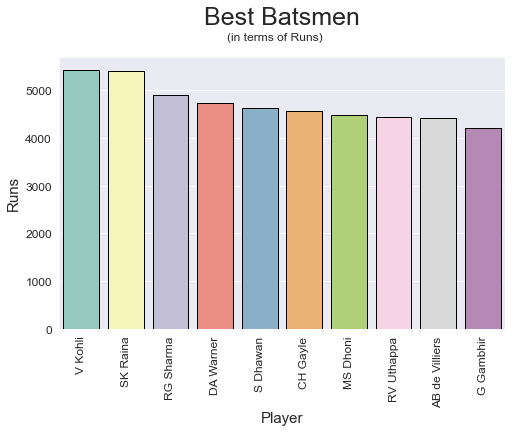

In [55]:
best_batsman = deliveries.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman = best_batsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman.index, y=best_batsman['batsman_runs'], palette='Set3',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Batsmen\n', size=25)
plt.suptitle('\n(in terms of Runs)')
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

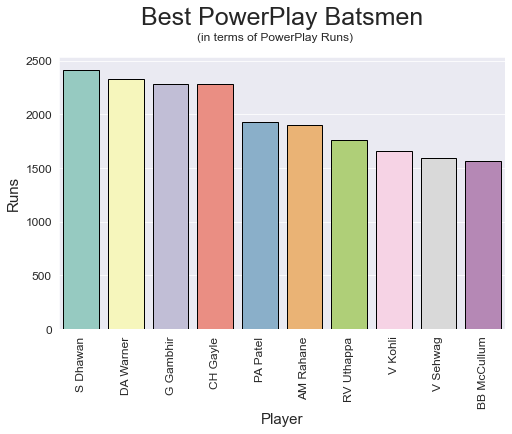

In [58]:
best_batsman_pp = deliveries.loc[deliveries['over'].isin(powerplay)]
best_batsman_pp = best_batsman_pp.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman_pp = best_batsman_pp.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman_pp.index, y=best_batsman_pp['batsman_runs'], palette='Set3',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best PowerPlay Batsmen\n', size=25)
plt.suptitle('\n(in terms of PowerPlay Runs)')
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

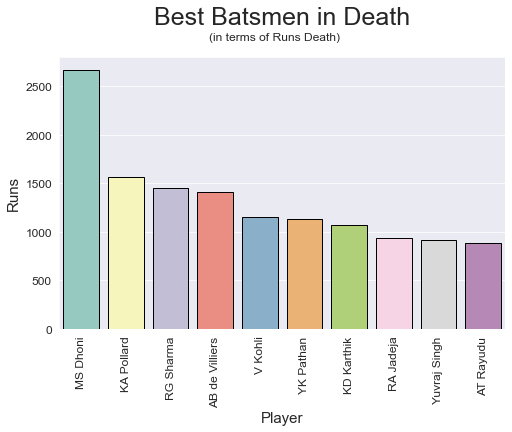

In [59]:
best_batsman_death = deliveries.loc[deliveries['over'].isin(death)]
best_batsman_death = best_batsman_death.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman_death = best_batsman_death.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman_death.index, y=best_batsman_death['batsman_runs'], palette='Set3', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Batsmen in Death\n', size=25)
plt.suptitle('\n(in terms of Runs Death)')
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

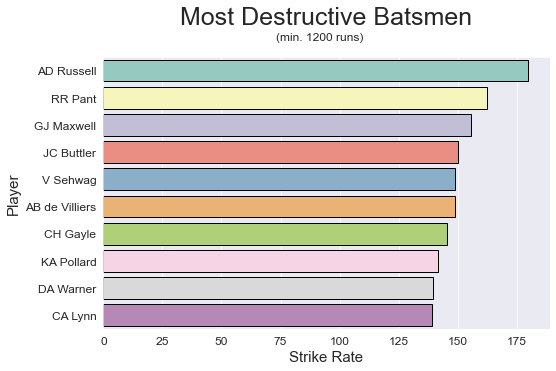

In [60]:
strike_rate = deliveries.groupby(['batsman']).batsman_runs.sum().reset_index()
strike_rate['balls'] = deliveries.groupby(['batsman']).ball.count().reset_index()['ball']
strike_rate['rate'] = strike_rate['batsman_runs']/strike_rate['balls']*100
strike_rate = strike_rate[strike_rate['batsman_runs'] >= 1200].sort_values(by=['rate'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=strike_rate['rate'], y=strike_rate['batsman'], palette='Set3', edgecolor='black')
plt.title('Most Destructive Batsmen\n', size=25)
plt.suptitle('\n(min. 1200 runs)')
plt.ylabel('Player', size=15)
plt.xlabel('Strike Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

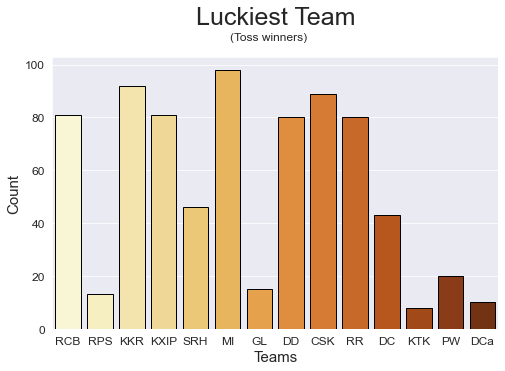

In [61]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.countplot(x=matches['toss_winner'], palette='YlOrBr', edgecolor='black')
plt.title('Luckiest Team\n', size=25)
plt.ylabel('Count', size=15)
plt.xlabel('Teams', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.suptitle('\n(Toss winners)')
plt.show()

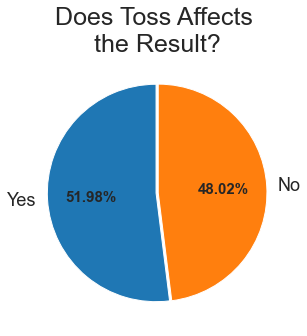

In [63]:
toss = matches.loc[matches['toss_winner'] == matches['winner']]
data = [len(toss), len(matches)-len(toss)]
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(data, labels=['Yes', 'No'], startangle=90,explode=(.01,.01) ,autopct='%1.2f%%')
plt.title('Does Toss Affects \nthe Result?',size=25)
plt.setp(texts, size=18)
plt.setp(autotexts, size=15, weight="bold")
plt.show()

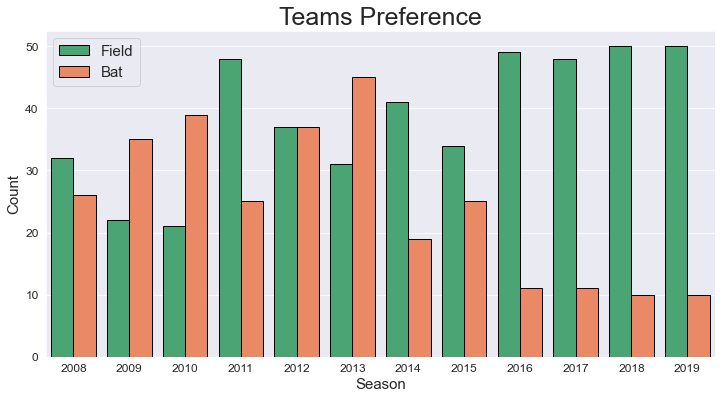

In [64]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.countplot(x=matches['season'],hue=matches['toss_decision'] 
              ,palette=dict(field='mediumseagreen',bat='coral'), edgecolor='black')
plt.title('Teams Preference', size=25)
plt.ylabel('Count', size=15)
plt.xlabel('Season', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(('Field', 'Bat'), prop={"size" :15})
plt.show()

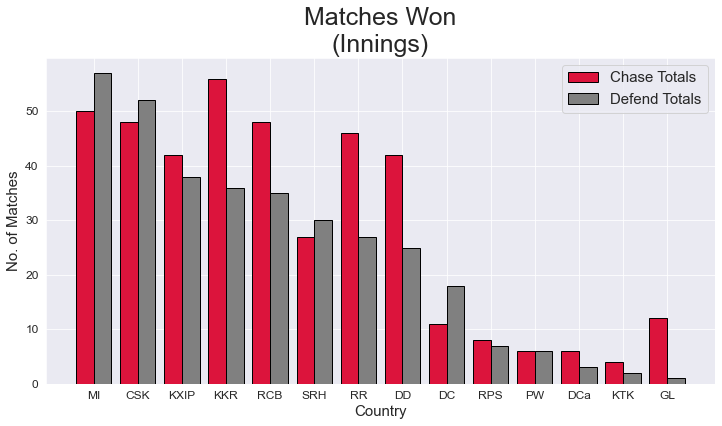

In [65]:
innings = matches.loc[matches['win_by_runs'] != 0]
innings = innings['winner'].value_counts().reset_index().set_index('index')
innings.columns = ['Defend Totals']
innings2 = matches.loc[matches['win_by_wickets'] != 0]
innings2 = innings2['winner'].value_counts().reset_index().set_index('index')
innings2.columns = ['Bat2']
innings['Chase Totals'] = innings2['Bat2']


x = np.arange(14)
fig,ax = plt.subplots(figsize=(12,6))
c1 = plt.bar(x- 0.2, innings['Chase Totals'], width=0.4, color='crimson', edgecolor='black')
c2 = plt.bar(x+0.2, innings['Defend Totals'], width=0.4, color='grey', edgecolor='black')
plt.xticks(size=12)
ax.set_xticks(x)
ax.set_xticklabels(innings.index)
plt.yticks(size=12)
plt.title('Matches Won\n(Innings)', size=25)
plt.xlabel('Country', size=15)
plt.ylabel('No. of Matches', size=15)
plt.legend((c1[0], c2[0]) ,('Chase Totals', 'Defend Totals'), prop={"size" :15}, loc=1)
plt.show()

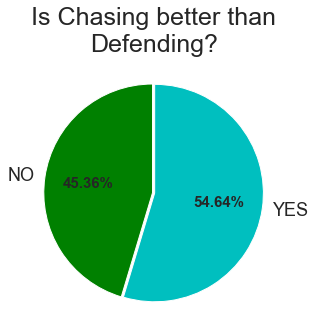

In [66]:
bat_first = matches.loc[matches['win_by_runs'] != 0]
bat_second = matches.loc[matches['win_by_wickets'] != 0]

data = [len(bat_first), len(bat_second)]
ilabels=['NO', 'YES']
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(data, labels= ilabels, startangle=90,explode=(.01,.01) ,autopct='%1.2f%%',
                                  colors=['g','c'])
plt.title('Is Chasing better than\nDefending?',size=25)
plt.setp(texts, size=18)
plt.setp(autotexts, size=15, weight="bold")
plt.show()

**Although Teams for the Last 4-5 years prefer to Chase, but there is no clear advantage to the the chasing team in terms of winning the Match as the probablity of them winning is only slightly higher than the other team.**

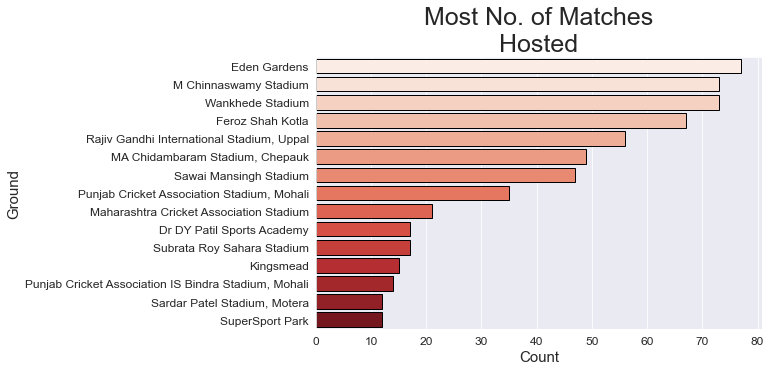

In [67]:
venue = matches['venue'].value_counts().reset_index().head(15)
venue.columns = ['ground', 'Matches']

plt.figure(figsize=(8,5))
sns.barplot(x=venue['Matches'],y=venue['ground'],palette='Reds' ,edgecolor='black')
plt.title('Most No. of Matches\nHosted', size=25)
plt.ylabel('Ground', size=15)
plt.xlabel('Count', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

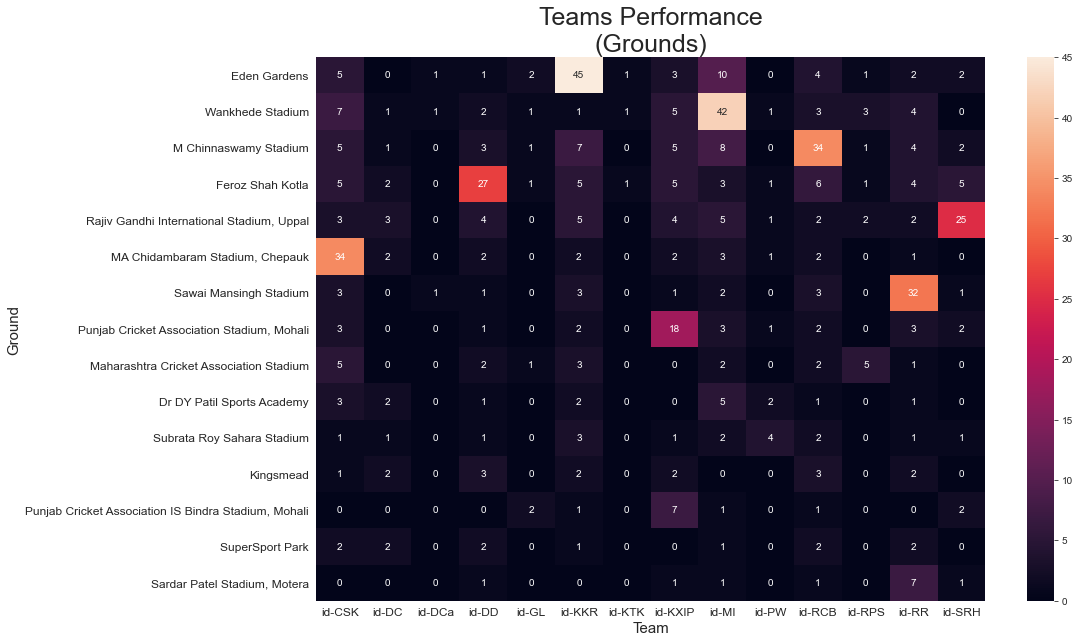

In [69]:
venue = matches.groupby(['venue','winner']).count()
venue = venue.iloc[:-1,:1].reset_index()
venue = venue.rename(columns={'season':'wins'})
venue = venue.pivot('venue','winner')
venue.fillna(0,inplace=True)
venue['total'] = venue.sum(axis=1,skipna=False)
venue = venue.sort_values(by=['total'], ascending=False).head(15)
venue.drop(['total'], axis=1, inplace=True)

sns.set_style('dark')
plt.figure(figsize=(15,10))
sns.heatmap(data=venue, annot=True, cmap='rocket')
plt.xlabel('Team', size=15)
plt.ylabel('Ground', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.title('Teams Performance\n(Grounds)', size=25)
plt.show()

**Most of the Teams such as MI, KKR and CSK are very strong at their home ground, whereas there is no Team who is dominant at away grounds. So, Home advantage is very crucial for Most of the Teams.**

### A Company looking for a Player to endorse its products should definitely try to Sign the likes of:

**CH Gayle, V. Kohli, L. Malinga, D. Warner, AB de Villiers, MS Dhoni, DJ Bravo, B.Kumar and AD Russell** These Players are match winners and have the most impact on the game according to the analysis, and the qualities they possess will be very much aligned with qualities of product and brand-value of the company.

**Also the Company should try to Sign Players from MI, CSK or KKR.** As these are the most successful Teams in the League and they will have the most fan-following among the other teams.

## ...Thank You...